In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import Markdown, display
import time

# Reading In Data

In [2]:
data = pd.read_csv("Data Files/Cleaned_Data_for_ML.csv")
data.head()

,Tm,Capacity,Week,Attendance,Year,Away Team Wins,Home Team Wins,Time,International
0,BUF,71608,1,69519,2013,0,0,0,0
1,CAR,74867,1,73294,2013,0,0,0,0
2,CHI,61500,1,62213,2013,0,0,0,0
3,CLE,67431,1,71513,2013,0,0,0,0
4,DAL,80000,1,85348,2013,0,0,1,0


In [3]:
data.groupby("Time").size()

Time
0    2072
1     174
2     170
3     148
4      40
dtype: int64

# Exploratory Data Analysis

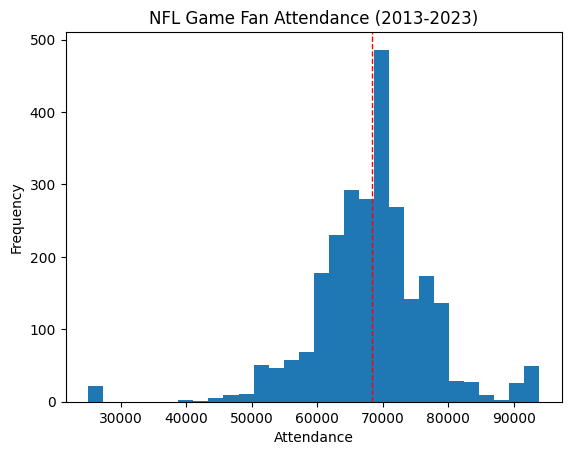

In [4]:
#Histogram

plt.hist(data["Attendance"], bins = 30)
plt.axvline(data["Attendance"].mean(), color='red', linestyle='dashed', linewidth=1)


plt.title("NFL Game Fan Attendance (2013-2023)")
plt.xlabel("Attendance")
plt.ylabel("Frequency")
plt.show()

In [5]:
data["Attendance"].std()
data["Attendance"].mean()
print(f"Mean Attendance: {int(data["Attendance"].mean())}\n"
      f"Std Dev Attendance: {int(data["Attendance"].std())}\n"
      f"Three Std Dev Below Mean: {int(data["Attendance"].mean() - 3*data["Attendance"].std())}\n"
      f"Three Std Dev Above Mean: {int(data["Attendance"].mean() + 3*data["Attendance"].std())}")

Mean Attendance: 68271
Std Dev Attendance: 8926
Three Std Dev Below Mean: 41491
Three Std Dev Above Mean: 95051


In [6]:
data[data["Attendance"] < 40000].groupby("Tm").size()

Tm
CIN     1
LAC    22
dtype: int64

A majority of low attendance values came from the LA Chargers during 2017-2021, where they played at a College Soccer Stadium with a max capacity of 27,000

In [7]:
data[data["Attendance"] > 90000].groupby("Tm").size()

Tm
DAL    75
LAR     1
dtype: int64

An overwhelming majority of high attendance outliers came from the Dallas Cowboys, AKA: America's Team. This comes to no surprise because not only do the Dallas Cowboys have the largest stadium capacity in the NFL, they also have the largest fanbase.

## Removing Outliers

In [8]:
data = data[~(data["Tm"] == "DAL")]
data = data[~((data["Tm"] == "LAC") & (data["Year"].isin([2017, 2018, 2019, 2021])))]

In [9]:
data.sort_values(by = "Attendance")

,Tm,Capacity,Week,Attendance,Year,Away Team Wins,Home Team Wins,Time,International
1714,CIN,65515,13,39804,2019,4,0,0,0
1680,TB,69218,10,40038,2019,3,2,0,0
1629,CIN,65515,7,42784,2019,2,0,0,0
1455,CIN,65515,13,44392,2018,5,5,0,0
1491,CIN,65515,15,44568,2018,3,5,0,0
...,...,...,...,...,...,...,...,...,...
2388,JAX,86000,4,85716,2023,2,1,0,1
1392,JAX,86000,8,85870,2018,3,3,0,1
891,LAR,93607,9,86109,2016,2,3,0,0
2176,JAX,86000,8,86215,2022,2,2,0,1


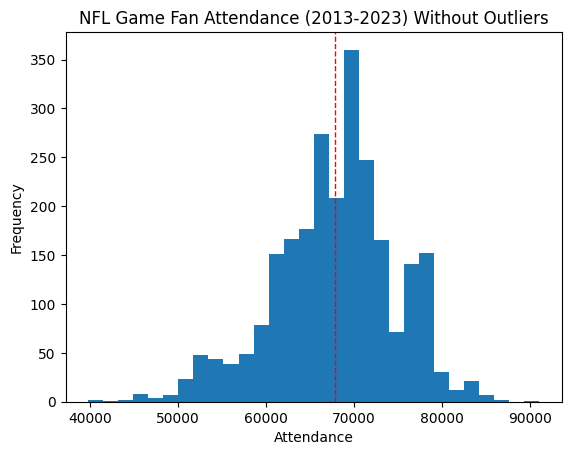

In [10]:
#Histogram Without Outliers

plt.hist(data["Attendance"], bins = 30)
plt.axvline(data["Attendance"].mean(), color='red', linestyle='dashed', linewidth=1)


plt.title("NFL Game Fan Attendance (2013-2023) Without Outliers")
plt.xlabel("Attendance")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Attendance')

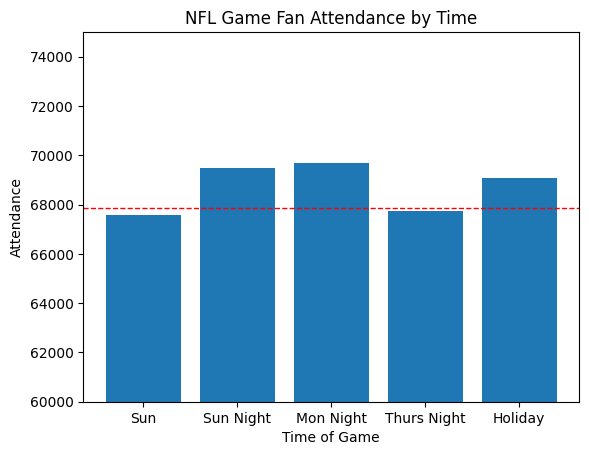

In [11]:
#Group By Time

gb_time = data.groupby("Time").agg(mean = ("Attendance", "mean"))
times = ["Sun", "Sun Night", "Mon Night", "Thurs Night", "Holiday"]

plt.bar(times, gb_time["mean"])
plt.ylim(60000, 75000)
plt.axhline(data["Attendance"].mean(), color='red', linestyle='dashed', linewidth=1)
plt.title("NFL Game Fan Attendance by Time")
plt.xlabel("Time of Game")
plt.ylabel("Attendance")

Monday Games appear to have the largest turnouts, which is surprising. One plausible explanation is that many people like to watch all 10-12 games on Sunday at home. Sunday Night Games and Holiday games are the next most attended. Not only are people off from work, but these games typically involve highly ranked teams that are playoff contenders. Conversely, Thursday Night is the least attended "Primetime" game because these spots feature bottom-half teams more so than Sunday or Monday Night. Lastly, Sunday during the day is the lease attended overall. This makes sense because of all the teams that are poor performers during the season. These teams typically see a less filled stadium as fans give up hope.

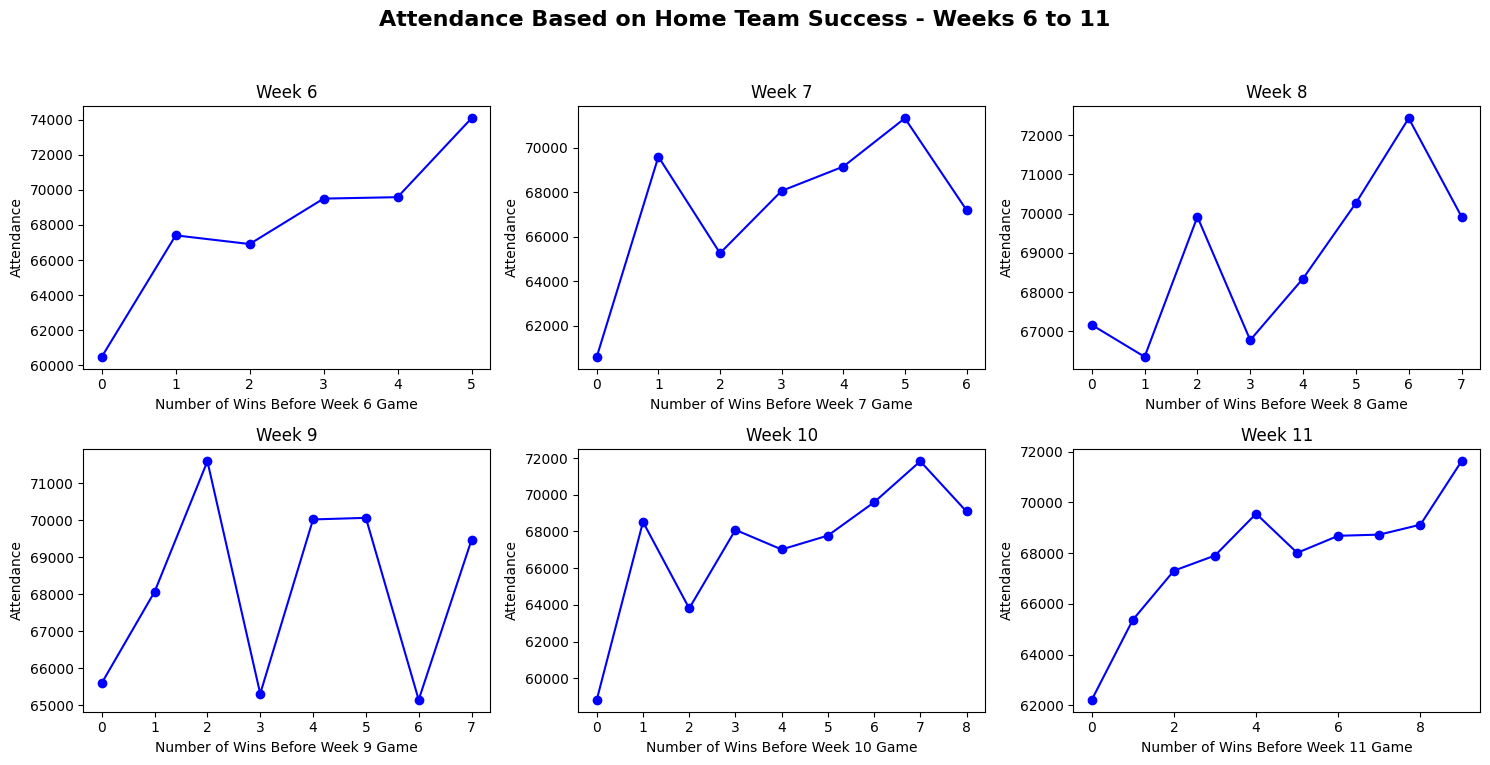

In [12]:
weeks = [6, 7, 8, 9, 10, 11]

fig, axs = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns

for i, week in enumerate(weeks):
    # Select the current subplot
    ax = axs[i // 3, i % 3]  # Determine subplot position

    # Filter data for the current week
    wins_df = data[(data["Week"] == week) & (data["Home Team Wins"] != -1)].groupby("Home Team Wins").agg(mean_attendance=("Attendance", "mean"))

    # Plot the data
    ax.plot(wins_df.index, wins_df["mean_attendance"], marker='o', linestyle='-', color='b')

    # Set title and labels
    ax.set_title(f"Week {week}")
    ax.set_xlabel(f"Number of Wins Before Week {week} Game")
    ax.set_ylabel("Attendance")

plt.suptitle("Attendance Based on Home Team Success - Weeks 6 to 11", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Despite the sporadic line graphs in week 8 and 9, there is a general upward correlation between number of games won and Attendance. This makes sense, as teams with good on field performance attract more of their fans to attend a game.

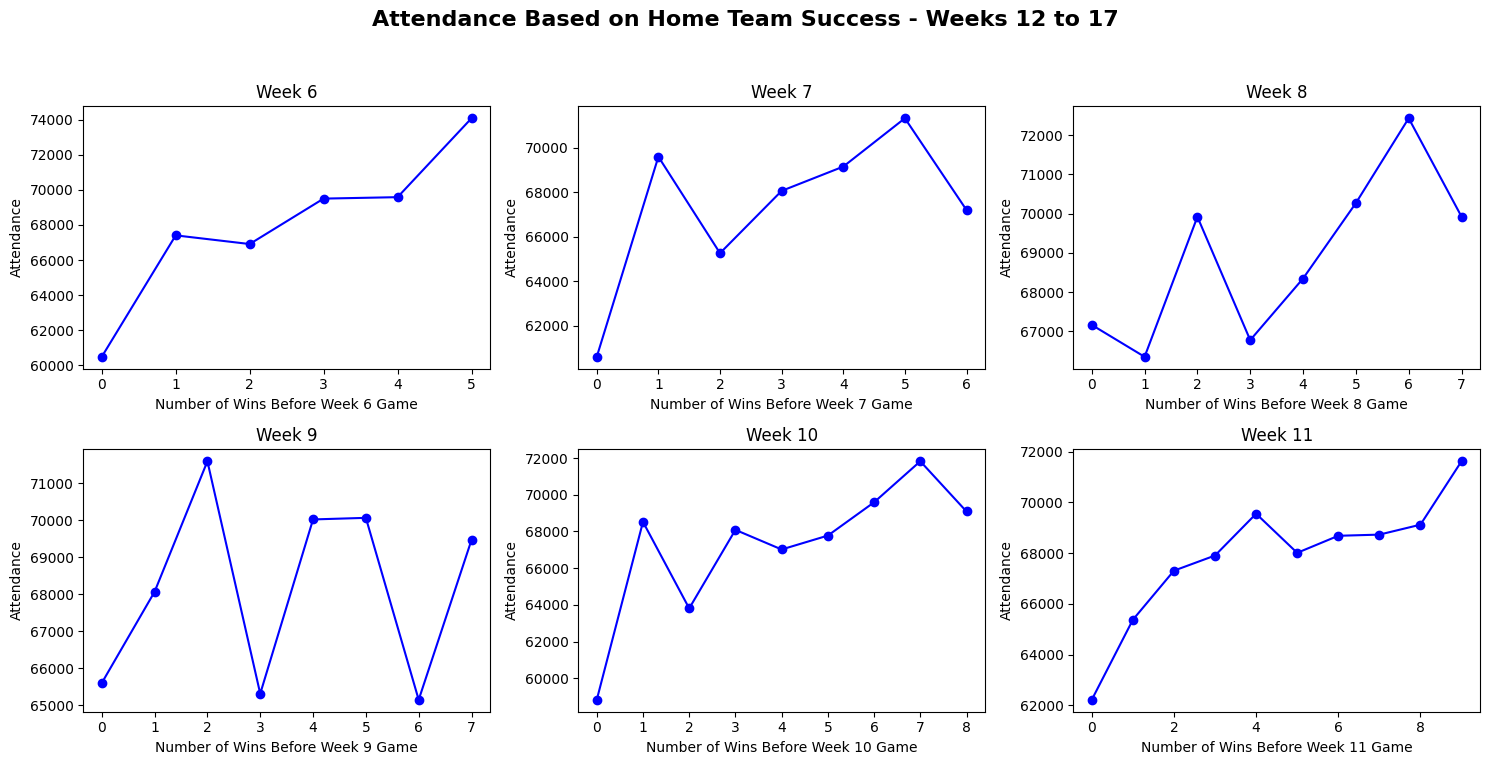

In [13]:
weeks2 = [12, 13, 14, 15, 16, 17]

fig, axs = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns

for i, week in enumerate(weeks):
    # Select the current subplot
    ax = axs[i // 3, i % 3]  # Determine subplot position

    # Filter data for the current week
    wins_df = data[(data["Week"] == week) & (data["Home Team Wins"] != -1)].groupby("Home Team Wins").agg(mean_attendance=("Attendance", "mean"))

    # Plot the data
    ax.plot(wins_df.index, wins_df["mean_attendance"], marker='o', linestyle='-', color='b')

    # Set title and labels
    ax.set_title(f"Week {week}")
    ax.set_xlabel(f"Number of Wins Before Week {week} Game")
    ax.set_ylabel("Attendance")

plt.suptitle("Attendance Based on Home Team Success - Weeks 12 to 17", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Later in the season, this correlation is more prominent. Additionally, the wider range in number of wins displays this relationship well.

## Correlation Matrix

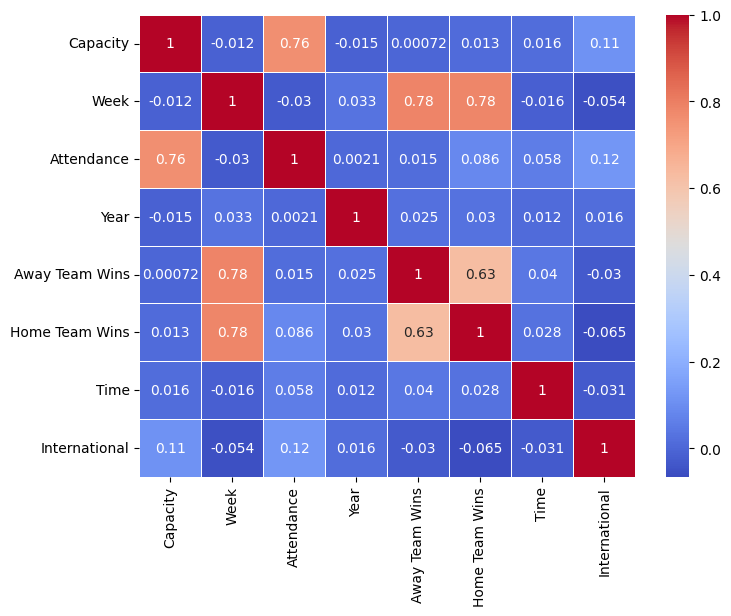

In [14]:
correlation_matrix = data.drop(columns = ["Tm"]).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()

From all of the correlations with "Attendance", Capacity obviously has the largest correlation coefficient (0.78). 

Similar to the Decision Tree Model, the Random Forest Model relies mainly on same 3 variables. However, the Random Forest Model made use of the Away Team Wins and International variable.

In [330]:
RF_y_pred = model_cv.predict(test_x)

r2_test = sklearn.metrics.r2_score(test_y, RF_y_pred)

RMSE_test = sklearn.metrics.root_mean_squared_error(test_y, RF_y_pred)

print('R-squared on Train Set: %0.2f' %r2_test)
print('RMSE on Train Set: %0.2f' %RMSE_train)

R-squared on Train Set: 0.78
RMSE on Train Set: 4387.72


## Writing Data to CSV

In [16]:
data.to_csv("Data Files/Clean_Data_for_ML.csv", index = False)